In [22]:
# read in testing data
import pandas as pd
data = pd.read_csv('test_df.csv').drop('Unnamed: 0', axis=1)
data

import numpy as np
for i in range(len(data)):
    data_array = []
    data_string = ''
    data_string = data_string + ' ' + data['gameDescription'][i]
    try:
        data_string = data_string + ' ' + data['series'][i]
    except:
        data_string = data_string + ''
    try: 
        data_string = data_string + ' ' + data['keywords'][i]
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['themes'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['playerPerspectives'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['genres'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['playModes'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['systems'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    if data['memberRating'][i] == 'Fair':
        rating = 1
    elif data['memberRating'][i] == 'Alright':
        rating = 2
    elif data['memberRating'][i] == 'Average':
        rating = 1
    elif data['memberRating'][i] == 'Good':
        rating = 3
    elif data['memberRating'][i] == 'Great':
        rating = 4
    elif data['memberRating'][i] == 'Superb':
        rating = 4
    elif data['memberRating'][i] == 'Unimpressive':
        rating = 1
    elif data['memberRating'][i] == 'Very Bad':
        rating = 1
    elif data['memberRating'][i] == 'Bad':
        rating = 1
    elif data['memberRating'][i] == 'Awful':
        rating = 1
    data_array.append(rating)
    data_array.append(data_string)
    if i == 0:
        test_df = pd.DataFrame(np.reshape(data_array, (1,2)), columns = ['rating','text'])
    else:
        df_length = len(test_df)
        test_df.loc[df_length] = data_array

In [20]:
test_df.to_csv('cleaned_test_df.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    min_df=1,  # min count for relevant vocabulary
    max_features=4000,  # maximum number of features
    strip_accents='unicode',  # replace all accented unicode char 
    # by their corresponding  ASCII char
    analyzer='word',  # features made of words
    token_pattern=r'\w{1,}',  # tokenize only words of 4+ chars
    ngram_range=(1, 1),  # features made of a single tokens
    use_idf=True,  # enable inverse-document-frequency reweighting
    smooth_idf=True,  # prevents zero division for unseen words
    sublinear_tf=False)

tfidf_df = tfidf_vectorizer.fit_transform(test_df['text'])

In [ ]:
tfidf_vectorizer.get_feature_names()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_df['text'].to_numpy(), test_df['rating'].to_numpy(),
                                                    test_size=0.50, random_state=42)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Train
y_train=y_train.astype(int)
rf.fit(vectors_train, y_train)
rf.predict(vectors_test)
# # Load packages
# import pandas as pd
# from sklearn.datasets import load_boston
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import tree
# from dtreeviz.trees import dtreeviz # will be used for tree visualization
# from matplotlib import pyplot as plt
# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.rcParams.update({'font.size': 14})

# len(rf.estimators_)

# plt.figure(figsize=(20,20))
# _ = tree.plot_tree(rf.estimators_, filled=True)

array([3, 1, 3, ..., 2, 3, 2])

In [12]:
rf.estimators_[0].tree_.max_depth

121

In [13]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=3)

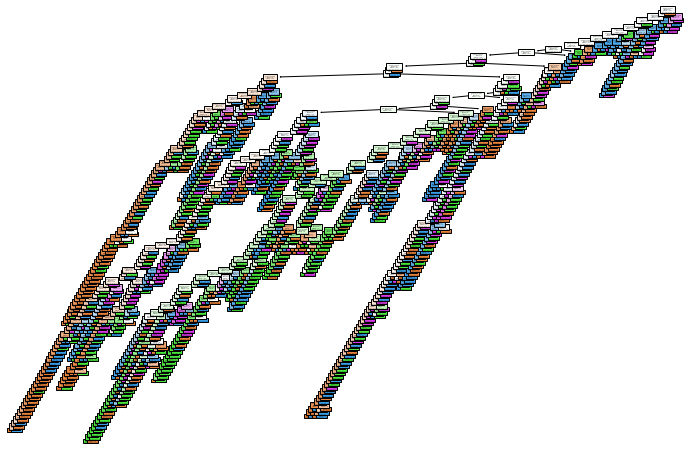

In [15]:
_ = tree.plot_tree(rf.estimators_[0], filled=True)

In [17]:
viz = dtreeviz(rf.estimators_[0], X, y, target_name="Target")
viz

NameError: name 'X' is not defined

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_df['text'].to_numpy(), test_df['rating'].to_numpy(),
                                                    test_size=0.50, random_state=42)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Train
y_train=y_train.astype(int)
rf.fit(vectors_train, y_train)

RandomForestClassifier()

In [25]:
test_df

,rating,text
0,2,#KILLALLZOMBIES is an insane twin-stick zombi...
1,3,"You got a problem? Yo, she’ll splode it. At t..."
2,2,Be prepared to be transported to a reality of...
3,2,A remastered collection of the .hack//G.U. se...
4,2,.hack//G.U. simulates a massively multiplayer...
...,...,...
5629,2,Updated version of the classic Puyo Puyo puzz...
5630,2,Puyo Puyo is a puzzle game in which the playe...
5631,2,This is the 7th game in the main Puyo Puyo se...
5632,2,"Easy to learn, tough to master! Jump straight..."
